In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

fs = 128 # Sampling frequency

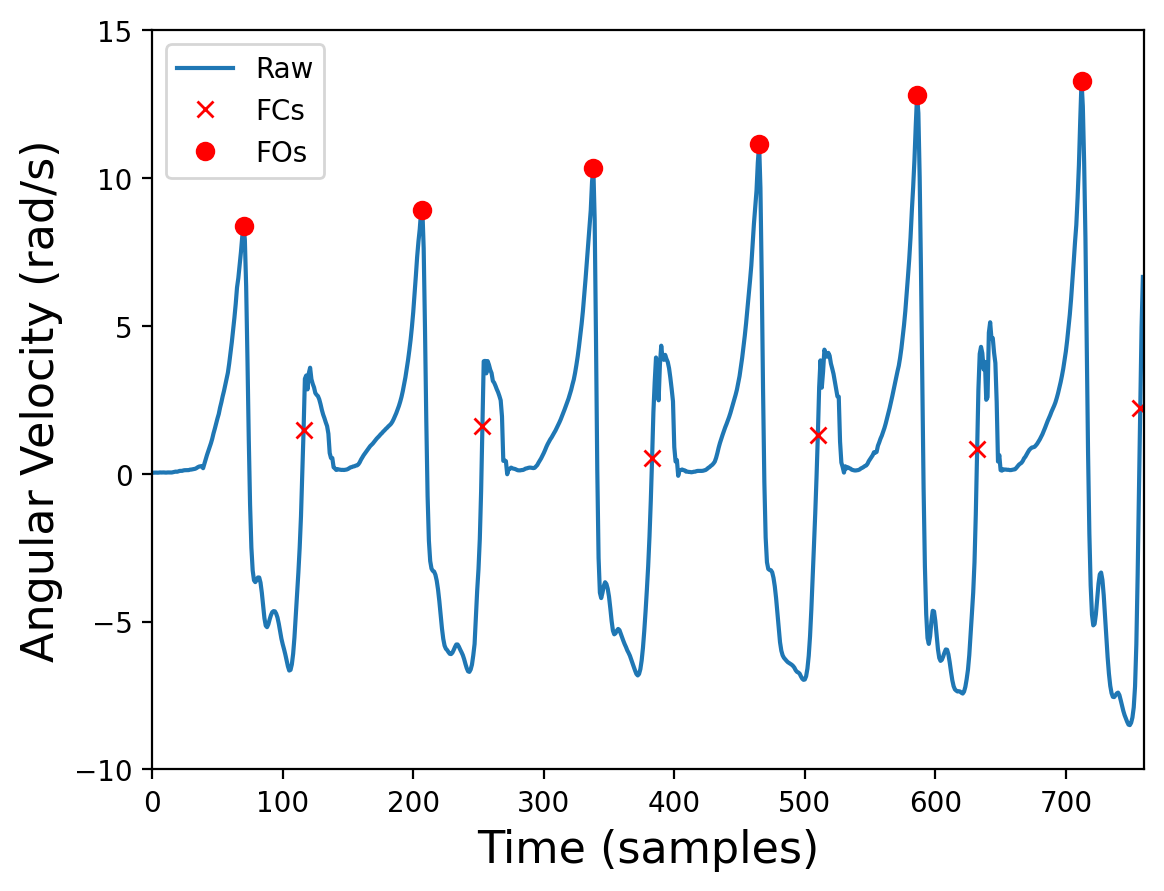

In [2]:
# Read the csv data, convert it as an array, remove useless dimension
x = pd.read_csv('./data/ITW_gML.csv').to_numpy().squeeze()

# Filter the reversed signal in order to find the peaks that 
# roughly correspond to the mid-swing phase of the gait cycle. 
b, a = signal.butter(N=2, Wn=5/(fs * .5), btype='low')
gML = signal.filtfilt(b, a, x)
peaks, _ = signal.find_peaks(-gML, height=np.std(gML), distance=fs * .5)

# Insert a fake mid-swing peak to comply array dimensions
locs = np.insert(peaks, peaks.shape[0], x.shape[0])

FC, FO = [], []

# Foot Contact / Heel Strike
for i in range(0, locs.shape[0]):
    for k in range(locs[i-1], locs[i]):
        if (x[k] * x[k-1] < 0) and x[k] > 0:
            FC.append(k)
            break

# Insert fake 0 and end peak to comply for array dimensions
locs = np.insert(peaks, 0, 0)
locs = np.insert(locs, locs.shape[0], x.shape[0]-2)

# Foot Off / Toe-Off
for i in range(0, locs.shape[0]):
    for k in range(locs[i], locs[i-1], -1):
        if (x[k] > x[k-1]) and (x[k] > x[k+1]) and (x[k] > np.std(x)):
            FO.append(k)
            break
                                    
# Make sure that everything is fine by plotting what has been computed
f = plt.figure(dpi = 200)
plt.plot(x)
plt.plot(FC, x[FC], marker='x', color='red', linestyle='none')
plt.plot(FO, x[FO], marker='o', color='red', linestyle='none')

plt.xlim([0, x.shape[0]])
plt.xlabel('Time (samples)', fontsize=16)
plt.ylabel('Angular Velocity (rad/s)', fontsize=16)
plt.ylim([-10,15])
plt.legend(['Raw','FCs', 'FOs'], loc='upper left')